<a href="https://colab.research.google.com/github/Jsh04/ciencia-de-dados-mestrado/blob/main/Analise_acidentes_de_veiculos_2016_projeto_mestrado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto Data Science**  
# Análise -> acidentes de veiculos de 2016


In [4]:
# Importando as bibliotecas (Pandas e Numpy)

import pandas as pd
import numpy as np

In [15]:
# Importando os dados e criando o DataFrame
dataframe = pd.read_csv('/content/acidentes-2016.csv', sep=';')

In [29]:
#Listando as 5 primeiras linhas
dataframe.head(10)

,longitude,latitude,data de abertura,hora de abertura,bairro,endereco,complemento,tipo de ocorrencia,quantidade de vitimas,descricao,tipo
0,-34.905705,-8.037728,01/01/2016,18:30,JAQUEIRA,AV RUI BARBOSA,EM FRENTE AO PARQUE DA JAQUEIRA,COLISÃO,1,EM FRENTE AO PARQUE DA JAQUEIRA,Automóveis
1,-34.938068,-8.131177,04/01/2016,16:05,JORDÃO,RUADRALVAROFERRAZ,TERMINALDOÔNIBUSDEJORDÃOBAIXO,COLISÃO,1,TERMINALDOÔNIBUSDEJORDÃOBAIXO,Automóveis
2,-34.915617,-7.993612,06/01/2016,17:33,DOISUNIDOS,RUAVINTEEUMDEJUNHO343,PRÓXIMOAASSEMBLÉIADEDEUSEANTENADAOI,CHOQUE,1,PRÓXIMOAASSEMBLÉIADEDEUSEANTENADAOI,Automóveis
3,-34.896884,-8.118186,07/01/2016,10:29,BOAVIAGEM,AVENGENHEIRODOMINGOSFERREIRA3333,EMFRENTEAGALERIASANTAROSA,COLISÃO,1,EMFRENTEAGALERIASANTAROSA,Automóveis
4,-34.910203,-8.098421,07/01/2016,13:53,IMBIRIBEIRA,AVMARECHALMASCARENHASDEMORAES,EMBAIXODOSEMAFORO288,COLISÃO,1,EMBAIXODOSEMAFORO288,Automóveis
5,-34.905163,-8.145027,07/01/2016,20:09,BOAVIAGEM,AVBOAVIAGEM6472,NOSEMAFORO149,COLISÃO,F,NOSEMAFORO149,Automóveis
6,-34.897739,-8.057084,08/01/2016,02:42,CAMPOGRANDE,AVGOVERNADORAGAMENONMAGALHAES,SEMÁFOROEMFRENTEAOPRÉDIODOIC,CHOQUE,1,SEMÁFOROEMFRENTEAOPRÉDIODOIC,Automóveis
7,-34.924518,-8.115325,08/01/2016,06:38,IPSEP,AVRECIFE,SENTIDOAEROPORTOSUBURBIOEMBAIXODOSEMAFORO130,COLISÃO,1,SENTIDOAEROPORTOSUBURBIOEMBAIXODOSEMAFORO130,Automóveis
8,-34.900703,-8.034977,08/01/2016,18:56,TAMARINEIRA,RUADRJOSEMARIA1038,PROX.AOHOSPITALDATAMARINEIRA,COLISÃO,1,PROX.AOHOSPITALDATAMARINEIRA,Automóveis
9,-34.922667,-8.033516,09/01/2016,15:03,CASAFORTE,AVDEZESSETEDEAGOSTO1766,EMFRENTEAOBARREAL,COLISÃO,1,EMFRENTEAOBARREAL,Automóveis


In [10]:
#Quantidade de linhas e colunas
dataframe.shape

(1231, 11)

In [11]:
#Verificando quantidade de atributos com os registros vazios (Nulos)
dataframe.isnull().sum()

,0
longitude,0
latitude,0
data de abertura,0
hora de abertura,0
bairro,2
endereco,1
complemento,18
tipo de ocorrencia,5
quantidade de vitimas,0
descricao,24


In [17]:
#Definindo os tipos de dados na tabela
dataframe.dtypes

,0
longitude,float64
latitude,float64
data de abertura,object
hora de abertura,object
bairro,object
endereco,object
complemento,object
tipo de ocorrencia,object
quantidade de vitimas,object
descricao,object


In [37]:
#Corrigindo os tipos de dados que estão como objects
dataframe['bairro'] = dataframe['bairro'].astype('category')
dataframe['complemento'] = dataframe['complemento'].astype('category')
dataframe['descricao' ] = dataframe['complemento'].astype('category')

ValueError: cannot convert float NaN to integer

In [19]:
#Verificando a os atributos de bairro
dataframe['bairro'].cat.categories

Index(['AFLITOS', 'AFOGADOS', 'ALTO JOSÉ BONIFÁCIO', 'ALTO JOSÉ DO PINHO',
       'ALTO SANTA TERESINHA', 'APIPUCOS', 'AREIAS', 'ARRUDA',
       'BAIRRO DO RECIFE', 'BARRO', 'BEBERIBE', 'BOA VIAGEM', 'BOA VISTA',
       'BOAVIAGEM', 'BOAVISTA', 'BOMBA DO HEMETÉRIO', 'BONGI',
       'BRASÍLIA TEIMOSA', 'BREJO DE BEBERIBE', 'CABANGA', 'CAJUEIRO',
       'CAMPINA DO BARRETO', 'CAMPO GRANDE', 'CAMPOGRANDE', 'CASA AMARELA',
       'CASA FORTE', 'CASAFORTE', 'CAXANGÁ', 'CAÇOTE', 'CIDADE UNIVERSITÁRIA',
       'COELHOS', 'COQUEIRAL', 'CORDEIRO', 'CURADO', 'DERBY', 'DOIS IRMÃOS',
       'DOIS UNIDOS', 'DOISUNIDOS', 'ENCRUZILHADA', 'ENGENHO DO MEIO',
       'ESPINHEIRO', 'ESTÂNCIA', 'FUNDÃO', 'GRAÇAS', 'GUABIRABA', 'HIPÓDROMO',
       'IBURA', 'ILHA DO LEITE', 'ILHA DO RETIRO', 'ILHA JOANA BEZERRA',
       'IMBIRIBEIRA', 'IPSEP', 'IPUTINGA', 'JAQUEIRA', 'JARDIM SÃO PAULO',
       'JIQUIÁ', 'JOANA BEZERRA', 'JORDÃO', 'LINHA DO TIRO', 'MACAXEIRA',
       'MADALENA', 'MANGABEIRA', 'MANGUEIRA', 'MU

In [27]:
# Mostrando a moda do dataframe para o atributo 'Bairro'. Aqui podemos tirar uma conclusão de que o bairro que, infelizmente mais ocorreu acidentes de vítimas fatais, é
# no bairro de Boa Viagem no ano de 2016
moda_bairro = dataframe['bairro'].mode()
soma_de_acidentes = (dataframe['bairro'] == 'BOA VIAGEM').sum()
print(moda_bairro)
print(soma_de_acidentes)

0    BOA VIAGEM
Name: bairro, dtype: category
Categories (92, object): ['AFLITOS', 'AFOGADOS', 'ALTO JOSÉ BONIFÁCIO', 'ALTO JOSÉ DO PINHO',
                          ..., 'TOTÓ', 'VASCO DA GAMA', 'VÁRZEA', 'ÁGUA FRIA']
117


In [32]:
# Imputando valores ausentes na coluna 'bairro' com a moda
dataframe['bairro'].fillna(dataframe['bairro'].mode()[0], inplace=True)

# Verificando se ainda há valores ausentes na coluna 'bairro'
print(dataframe['bairro'].isnull().sum())

0


/tmp/ipython-input-32-4217656314.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataframe['bairro'].fillna(dataframe['bairro'].mode()[0], inplace=True)


In [33]:
dataframe['bairro'].head()

,bairro
0,JAQUEIRA
1,JORDÃO
2,DOISUNIDOS
3,BOAVIAGEM
4,IMBIRIBEIRA


In [38]:
dataframe['quantidade de vitimas'].isna().sum()

np.int64(21)

In [50]:
#Inputando na coluna 'quantidade de vitimas' o valor 0
dataframe['quantidade de vitimas'].fillna(0, inplace=True)
print(dataframe['bairro'].isna().sum())

0


In [48]:
# Remove qualquer valor que não seja número (como '-', 'F', '', etc.)
dataframe['quantidade de vitimas'] = pd.to_numeric(dataframe['quantidade de vitimas'], errors='coerce')
dataframe['quantidade de vitimas']

,quantidade de vitimas
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
1226,1.0
1227,1.0
1228,1.0
1229,1.0


In [49]:
dataframe['quantidade de vitimas'].dtype

dtype('float64')

In [51]:
dataframe.head()

,longitude,latitude,data de abertura,hora de abertura,bairro,endereco,complemento,tipo de ocorrencia,quantidade de vitimas,descricao,tipo
0,-34.905705,-8.037728,01/01/2016,18:30,JAQUEIRA,AV RUI BARBOSA,EM FRENTE AO PARQUE DA JAQUEIRA,COLISÃO,1.0,EM FRENTE AO PARQUE DA JAQUEIRA,Automóveis
1,-34.938068,-8.131177,04/01/2016,16:05,JORDÃO,RUADRALVAROFERRAZ,TERMINALDOÔNIBUSDEJORDÃOBAIXO,COLISÃO,1.0,TERMINALDOÔNIBUSDEJORDÃOBAIXO,Automóveis
2,-34.915617,-7.993612,06/01/2016,17:33,DOISUNIDOS,RUAVINTEEUMDEJUNHO343,PRÓXIMOAASSEMBLÉIADEDEUSEANTENADAOI,CHOQUE,1.0,PRÓXIMOAASSEMBLÉIADEDEUSEANTENADAOI,Automóveis
3,-34.896884,-8.118186,07/01/2016,10:29,BOAVIAGEM,AVENGENHEIRODOMINGOSFERREIRA3333,EMFRENTEAGALERIASANTAROSA,COLISÃO,1.0,EMFRENTEAGALERIASANTAROSA,Automóveis
4,-34.910203,-8.098421,07/01/2016,13:53,IMBIRIBEIRA,AVMARECHALMASCARENHASDEMORAES,EMBAIXODOSEMAFORO288,COLISÃO,1.0,EMBAIXODOSEMAFORO288,Automóveis


In [56]:
# Converte a coluna 'data de abertura' para datetime com formato dia/mês/ano
dataframe['data de abertura'] = pd.to_datetime(dataframe['data de abertura'], format='%d/%m/%Y', errors='coerce')

In [57]:
dataframe['data de abertura'].dtype

dtype('<M8[ns]')

,data de abertura
0,2016-01-01
1,2016-01-04
2,2016-01-06
3,2016-01-07
4,2016-01-07
...,...
1226,2016-07-26
1227,2016-07-27
1228,2016-07-27
1229,2016-07-28


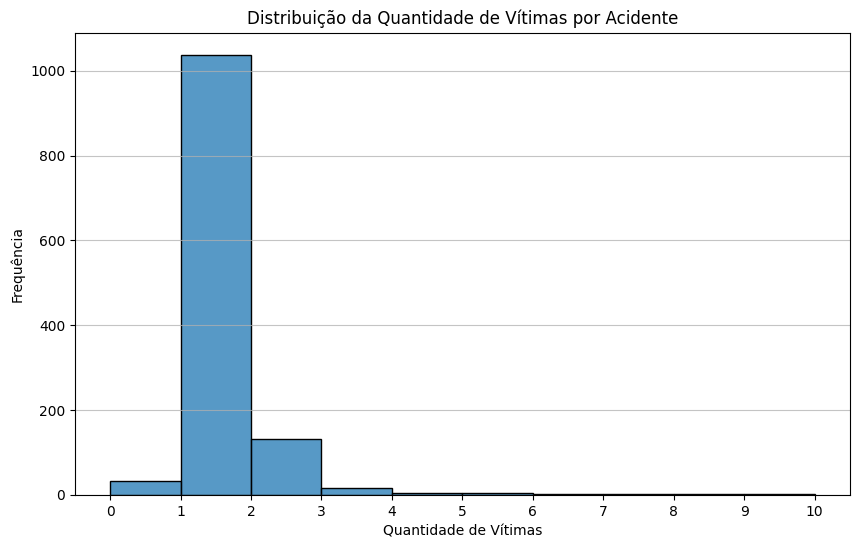

In [65]:
# Código gerado pelo Gemini (Aqui vemos que infelizmente no ano de 2016 houve mais de 1000 acidentes entre 1 a 2 vítimas)
import matplotlib.pyplot as plt
import seaborn as sns

df_victims = dataframe.dropna(subset=['quantidade de vitimas'])

# Criação do Histograma
plt.figure(figsize=(10, 6))
sns.histplot(data=df_victims, x='quantidade de vitimas', bins=range(int(df_victims['quantidade de vitimas'].max()) + 1), kde=False)
plt.xlabel('Quantidade de Vítimas')
plt.ylabel('Frequência')
plt.title('Distribuição da Quantidade de Vítimas por Acidente')
plt.xticks(range(int(df_victims['quantidade de vitimas'].max()) + 1))
plt.grid(axis='y', alpha=0.75)
plt.show()

In [76]:
# Código gerado com ajuda do Gemini (Aqui vemos o mês com o maior número de acidentes e a quantidades ao todo)
dataframe['month'] = dataframe['data de abertura'].dt.month
accidents_per_month = dataframe['month'].value_counts().sort_index()

month_with_most_accidents = accidents_per_month.idxmax()
number_of_accidents_in_that_month = accidents_per_month.max()

month_with_most_accidents_formated = int(month_with_most_accidents)
number_of_accidents_in_that_month = int(number_of_accidents_in_that_month)

print(month_with_most_accidents_formated, number_of_accidents_in_that_month)


7 217


In [82]:
# Hipótese 1:
# O número médio de vítimas é maior nos acidentes com motocicletas do que com automóveis.

# Hipótese 2:
# "Há diferença significativa na quantidade de acidentes entre BOA VIAGEM e outros bairros."

#Código gerado pelo ChatGPT
from scipy.stats import ttest_ind
vítimas_boa_viagem = dataframe[dataframe['bairro'] == 'BOA VIAGEM']['quantidade de vitimas']
vítimas_outros_bairros = dataframe[dataframe['bairro'] != 'BOA VIAGEM']['quantidade de vitimas']

# Aplica o teste t de Student
t_stat, p_val = ttest_ind(vítimas_boa_viagem, vítimas_outros_bairros, equal_var=False)

# Médias para interpretação
media_boa_viagem = vítimas_boa_viagem.mean()
media_outros = vítimas_outros_bairros.mean()

t_stat, p_val, media_boa_viagem, media_outros

# O p-valor = 0.0346 é menor que 0.05 (nível de significância típico).
# Rejeitamos a hipótese nula H₀ de que as médias são iguais.
# Conclusão: Há evidência estatística de que a média de vítimas em acidentes em BOA VIAGEM é diferente da média nos outros bairros.

(np.float64(-1.8986075118649994),
 np.float64(0.05897530390432762),
 np.float64(1.084033613445378),
 np.float64(1.1564748201438848))